In [1]:
import pandas as pd
import seaborn as sns

In [2]:
try:
    df = pd.read_csv(r"C:\Users\mitch\OneDrive\Documenten\Studie Toegepaste wiskunde\Moduleren project\GBS_MOD_12082024.csv", sep = ';')
except:
    df = pd.read_csv(r"C:\Users\Chong\Desktop\Modelleren project\info\GBS_MOD_12082024.csv", sep = ';')
    

In [3]:
#df = pd.read_csv(r"C:\Users\Chong\Desktop\Modelleren project\info\GBS_MOD_12082024.csv", sep = ';')

In [4]:
df

,Patientcode,Age,Sex,MRC_sum_e,MRC_sum_w1,CNI_e,CNI_Bulbar_e,CNI_Facial_e,CNI_Oculomotor_e,CNI_w1,...,Comorbidity_respiration,Days_between_onset_and_admission,Date_onset_weakness,Continent,Country_of_inclusion,Surv_days,Surv_status,Surv_unable_to_walk,Walking_again,Deceased
0,P0001,75.0,0,50.0,53.0,1.0,0.0,0.0,1.0,1.0,...,0.0,5.0,16-6-2016,1,5,125.0,1.0,1,1.0,0
1,P0002,22.0,0,50.0,46.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,22-11-2017,5,19,49.0,1.0,1,1.0,0
2,P0003,63.0,0,40.0,53.0,0.0,0.0,0.0,0.0,0.0,...,0.0,15.0,28-12-2020,2,11,752.0,0.0,1,NaN,0
3,P0004,30.0,1,60.0,59.0,1.0,1.0,1.0,1.0,1.0,...,0.0,10.0,30-3-2020,1,6,13.0,1.0,1,1.0,0
4,P0005,48.0,1,39.0,45.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,28-12-2015,1,2,14.0,0.0,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,P1496,52.0,1,19.0,NaN,0.0,0.0,0.0,0.0,NaN,...,0.0,12.0,4-9-2016,1,5,26.0,0.0,1,NaN,0
1496,P1497,66.0,0,54.0,55.0,1.0,1.0,1.0,0.0,0.0,...,0.0,9.0,4-2-2017,1,1,30.0,1.0,1,1.0,0
1497,P1498,67.0,0,33.0,46.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,30-4-2017,6,21,42.0,1.0,1,1.0,0
1498,P1499,35.0,1,1.0,3.0,1.0,1.0,0.0,0.0,1.0,...,0.0,5.0,3-10-2017,3,13,280.0,1.0,1,1.0,0


In [5]:
# df.columns

In [6]:
# a =  df[['Surv_status', 'Deceased']]

In [7]:
# df.dtypes

In [8]:
import datetime as dt
# past de datum naar yyyy-mm-dd
# dan selecteer dan mm om de correlatie te bepalen met andere data
df['date_hospital'] = pd.to_datetime(df['Date_onset_weakness'], format = "%d-%m-%Y")
df['date_month'] = df['date_hospital'].dt.month

In [9]:
df = df.drop(columns = ['Patientcode','Date_onset_weakness'])
df['CSF_protein_level'] = df['CSF_protein_level'].str.replace(',','.').astype(float)

df['Walking_again'] = df['Walking_again'].fillna(0)


In [10]:
import numpy as np
corr_matrix = df.corr()
sorted_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).unstack().sort_values(ascending=False)
sorted_corr

Country_of_inclusion  Continent                0.912135
MRC_sum_w1            MRC_sum_e                0.813435
Surv_unable_to_walk   GBSDS_e                  0.766703
GBSDS_w1              GBSDS_e                  0.762471
CNI_Oculomotor_w1     CNI_Oculomotor_e         0.758196
                                                 ...   
date_month            Ant_event_GE                  NaN
                      Ant_event_respiratory         NaN
                      Ant_event_vaccination         NaN
                      Ant_event_other               NaN
                      date_month                    NaN
Length: 1369, dtype: float64

In [11]:
a = df.corr()['date_month'].sort_values(ascending=False)
print(a)


date_month                          1.000000
Country_of_inclusion                0.042215
Continent                           0.042008
CSF_protein_level                   0.034668
Deceased                            0.032537
Comorbidity_respiration             0.028531
GBSDS_w1                            0.027320
Sens_deficits_e                     0.024639
date_hospital                       0.016433
Able_to_walk_e                      0.014984
Surv_status                         0.009699
GBSDS_e                             0.007570
Sens_deficits_w1                    0.004381
Pain_e                              0.003648
Days_between_onset_and_admission    0.000450
Pain_w1                             0.000274
CNI_Bulbar_w1                      -0.000925
CNI_Bulbar_e                       -0.005650
Surv_unable_to_walk                -0.007161
Surv_days                          -0.012387
Able_to_walk_w1                    -0.013766
CNI_e                              -0.017687
CNI_Facial

In [12]:
df['Continent'].value_counts()

Continent
1    878
2    178
5    176
4    164
3     71
6     33
Name: count, dtype: int64

In [13]:
df['Country_of_inclusion'].value_counts(sort=True)

Country_of_inclusion
1     196
19    176
11    161
6     160
5     130
2     129
7     102
18     66
15     63
3      60
13     51
8      40
10     34
17     28
21     25
4      18
12     17
14     16
9      16
16      6
20      6
Name: count, dtype: int64

<Axes: xlabel='Country_of_inclusion', ylabel='count'>

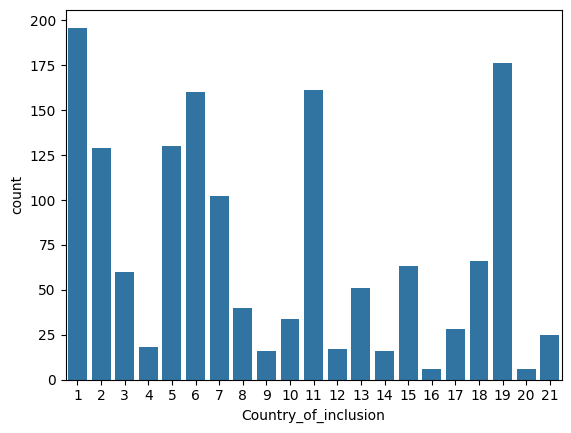

In [14]:
# sns.countplot(df,x='Continent')
sns.countplot(data  =df,x='Country_of_inclusion')

In [15]:
data = {
    'country_code': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
    'country_name': ['Nederland', 'Verenigd Koninkrijk', 'Duitsland', 'België', 'Denemarken', 
                     'Italië', 'Spanje', 'Frankrijk', 'Griekenland', 'Zwitserland', 
                     'Verenigde Staten', 'Canada', 'Argentinië', 'Brazilië', 'Japan', 
                     'Taiwan', 'Maleisië', 'China', 'Bangladesh', 'Australië', 'Zuid-Afrika']
}


df_klimaat = pd.DataFrame(data)

climate_data = {
    'A_Klimaat': ['Maleisië', 'Bangladesh', 'Brazilië'],
    'B_Klimaat': ['Spanje'],
    'C_Klimaat': ['Nederland', 'Verenigd Koninkrijk', 'België', 'Denemarken', 'Duitsland', 'Frankrijk', 'Italië', 'Griekenland', 'Zwitserland', 'Argentinië', 'Japan', 'Taiwan', 'China', 'Australië', 'Zuid-Afrika'],
    'D_Klimaat': ['Verenigde Staten', 'Canada']
}

# Function to assign the climate category based on the country
def assign_climate(country):
    if country in climate_data['A_Klimaat']:
        return 'A Klimaat'
    elif country in climate_data['B_Klimaat']:
        return 'B Klimaat'
    elif country in climate_data['C_Klimaat']:
        return 'C Klimaat'
    elif country in climate_data['D_Klimaat']:
        return 'D Klimaat'
    else:
        return 'Unknown'

# Add a new column 'Climate' to the dataframe
df_klimaat['klimaat'] = df_klimaat['country_name'].apply(assign_climate)


print(df_klimaat)


    country_code         country_name    klimaat
0              1            Nederland  C Klimaat
1              2  Verenigd Koninkrijk  C Klimaat
2              3            Duitsland  C Klimaat
3              4               België  C Klimaat
4              5           Denemarken  C Klimaat
5              6               Italië  C Klimaat
6              7               Spanje  B Klimaat
7              8            Frankrijk  C Klimaat
8              9          Griekenland  C Klimaat
9             10          Zwitserland  C Klimaat
10            11     Verenigde Staten  D Klimaat
11            12               Canada  D Klimaat
12            13           Argentinië  C Klimaat
13            14             Brazilië  A Klimaat
14            15                Japan  C Klimaat
15            16               Taiwan  C Klimaat
16            17             Maleisië  A Klimaat
17            18                China  C Klimaat
18            19           Bangladesh  A Klimaat
19            20    

<Axes: xlabel='klimaat', ylabel='count'>

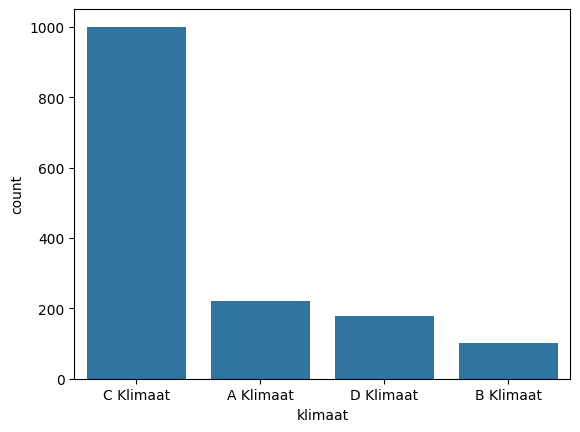

In [16]:
# df en df_klimaat joinen op elkaar
df = pd.merge(df, df_klimaat, 
                     left_on='Country_of_inclusion', right_on='country_code',
                     how = 'left')

df = df.drop(columns = 'country_code')

sns.countplot(data = df,x='klimaat')


In [17]:
df['klimaat'].value_counts()

klimaat
C Klimaat    1000
A Klimaat     220
D Klimaat     178
B Klimaat     102
Name: count, dtype: int64

<Axes: xlabel='halfrond', ylabel='count'>

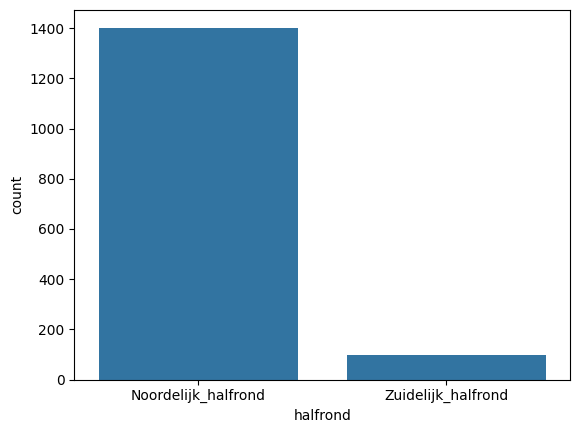

In [18]:
halfrond_data = {
    'Noordelijk_halfrond': ['Nederland', 'Verenigd Koninkrijk', 'Duitsland', 'België', 'Denemarken', 
                     'Italië', 'Spanje', 'Frankrijk', 'Griekenland', 'Zwitserland', 
                     'Verenigde Staten', 'Canada','Japan', 
                     'Taiwan', 'Maleisië', 'China', 'Bangladesh'],

    'Zuidelijk_halfrond': ['Argentinië','Brazilië','Australië', 'Zuid-Afrika']
}


def assign_halfrond(country):
    if country in halfrond_data['Noordelijk_halfrond']:
        return 'Noordelijk_halfrond'
    elif country in halfrond_data['Zuidelijk_halfrond']:
        return 'Zuidelijk_halfrond'


df['halfrond'] = df['country_name'].apply(assign_halfrond)


sns.countplot(data = df, x='halfrond')

Seizoenen definieren opbasis van de halfrond.

Noordelijk_halfrond: lente 3-5, zomer 6-8, herfst 9-11, winter 12-2

Zuidelijk halfrond: lente 9-11, zomer 12-2, herfst 3-5, winter 6-8

In [19]:
def seizoenen(halfrond, date_month):
    seizoen1 = [12,1,2]
    seizoen2 = [3,4,5]
    seizoen3 = [6,7,8]
    seizoen4 = [9,10,11]
    if str(halfrond) == 'Noordelijk_halfrond':
        if date_month in seizoen1:
            return "Winter"
        elif date_month in seizoen2:
            return "Lente"
        elif date_month in seizoen3:
            return "Zomer"
        elif date_month in seizoen4:
            return "Herfst"
        else:
            return None
    elif str(halfrond) == 'Zuidelijk_halfrond':
        if date_month in seizoen1:
            return "Zomer"
        elif date_month in seizoen2:
            return "Herfst"
        elif date_month in seizoen3:
            return "Winter"
        elif date_month in seizoen4:
            return "Lente"
        else:
            return None
    else:
        print("help")
    



In [20]:
df['halfrond'].dtype

dtype('O')

In [21]:
df['Seizoen'] = df.apply(lambda row: seizoenen(row['halfrond'], row['date_month']), axis=1)

In [22]:
# a = df[['country_name','date_month','Seizoen']]
# print(a)

<Axes: xlabel='Seizoen', ylabel='count'>

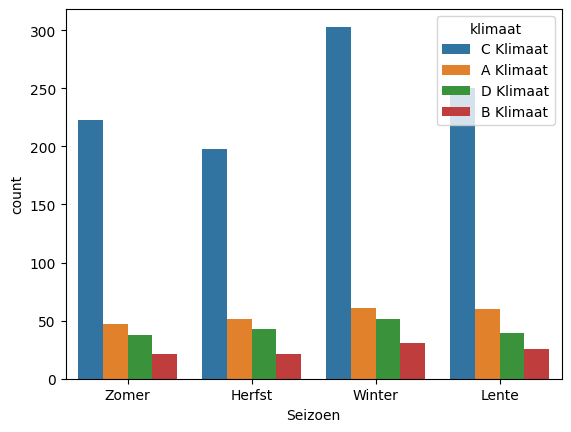

In [23]:
sns.countplot(data = df,x='Seizoen',hue='klimaat')